In [94]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [96]:
data = pd.read_csv('C:/Users/lenovo/Downloads/heart.csv')
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [98]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [100]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [102]:
print("Missing values:\n", data.isnull().sum())

Missing values:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [104]:

print("\nNumber of duplicate rows:", data.duplicated().sum())


Number of duplicate rows: 723


In [106]:
data = data.drop_duplicates()

In [108]:

# فصل الميزات والمتغير الهدف
X = data.drop('target', axis=1)
y = data['target']

# تقسيم البيانات إلى تدريب واختبار
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# إنشاء النموذج وتدريبه
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# التنبؤ على مجموعة الاختبار
y_pred = model.predict(X_test)

# تقييم النموذج
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

# طباعة النتائج
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", report)


Accuracy: 0.8032786885245902
Confusion Matrix:
 [[23  9]
 [ 3 26]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.72      0.79        32
           1       0.74      0.90      0.81        29

    accuracy                           0.80        61
   macro avg       0.81      0.81      0.80        61
weighted avg       0.82      0.80      0.80        61



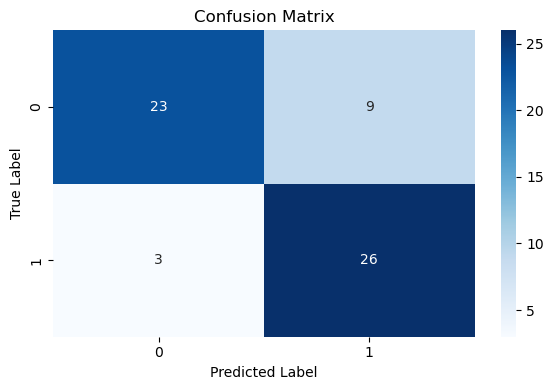

In [110]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()


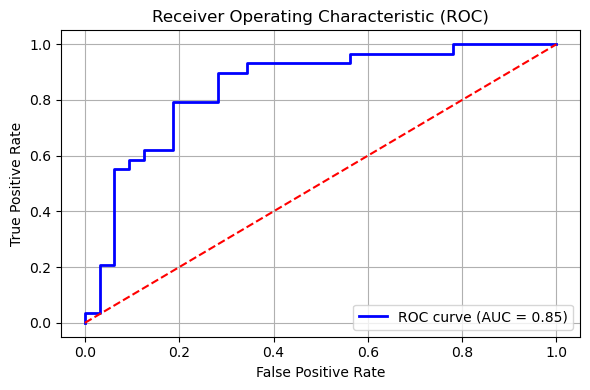

In [112]:
from sklearn.metrics import roc_curve, auc

y_prob = model.predict_proba(X_test)[:, 1]


fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()


Accuracy: 0.7704918032786885
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.66      0.75        32
           1       0.70      0.90      0.79        29

    accuracy                           0.77        61
   macro avg       0.79      0.78      0.77        61
weighted avg       0.79      0.77      0.77        61

Confusion Matrix:
[[21 11]
 [ 3 26]]


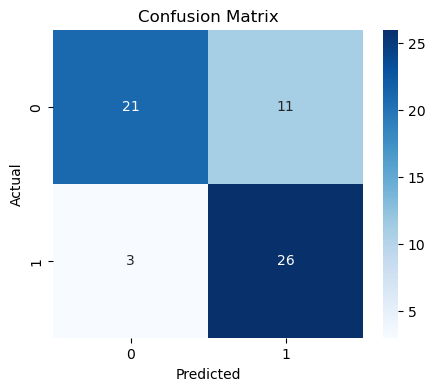

In [119]:

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train logistic regression model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_scaled, y_train)

# Predict on test set
y_pred = logreg.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)
print('Classification Report:')
print(classification_report(y_test, y_pred))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

# Plot confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

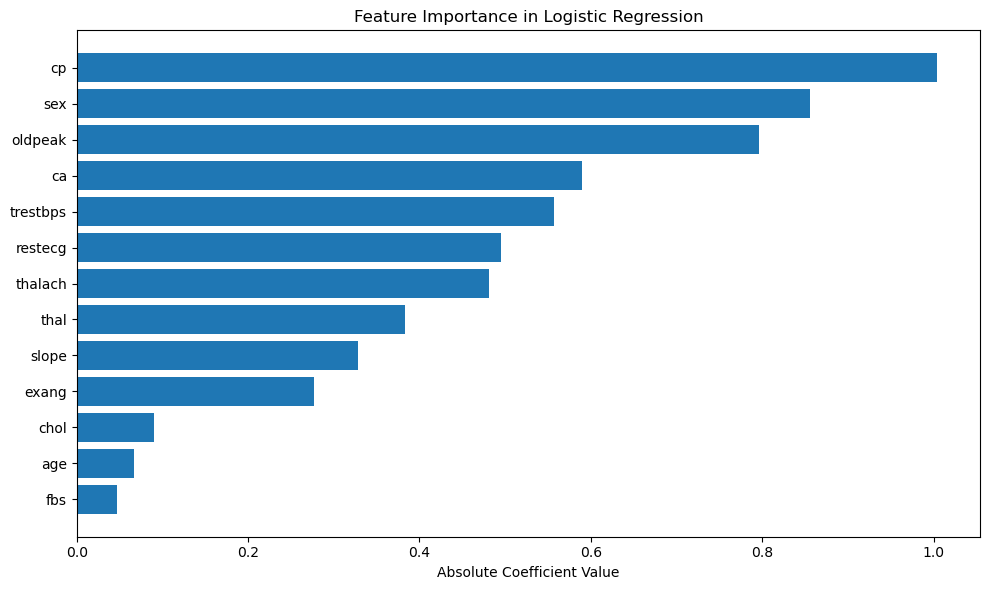

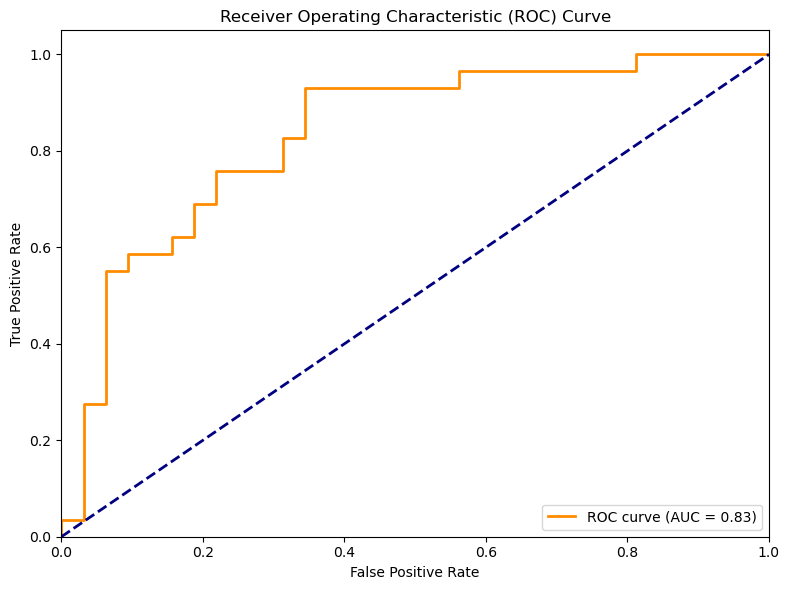

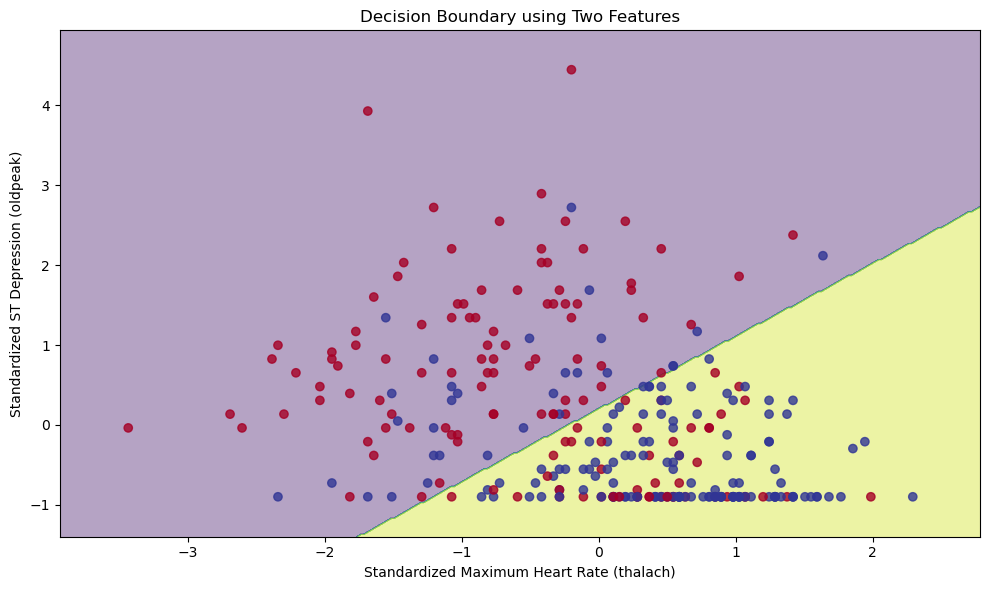

Visualizations of logistic regression characteristics displayed.


In [129]:
# Create multiple visualizations to show logistic regression characteristics

# 1. Feature importance plot
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': np.abs(logreg.coef_[0])
})
feature_importance = feature_importance.sort_values('Coefficient', ascending=True)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Coefficient'])
plt.title('Feature Importance in Logistic Regression')
plt.xlabel('Absolute Coefficient Value')
plt.tight_layout()
plt.show()

# 2. ROC Curve
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(y_test, logreg.predict_proba(X_test_scaled)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

# 3. Decision boundary for two features (using thalach and oldpeak)
from sklearn.preprocessing import StandardScaler

plt.figure(figsize=(10, 6))
X_subset = data[['thalach', 'oldpeak']]
y_subset = data['target']

# Scale the features
scaler_subset = StandardScaler()
X_subset_scaled = scaler_subset.fit_transform(X_subset)

# Fit logistic regression
logreg_subset = LogisticRegression()
logreg_subset.fit(X_subset_scaled, y_subset)

# Create a mesh grid
x_min, x_max = X_subset_scaled[:, 0].min() - 0.5, X_subset_scaled[:, 0].max() + 0.5
y_min, y_max = X_subset_scaled[:, 1].min() - 0.5, X_subset_scaled[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Make predictions on the mesh grid
Z = logreg_subset.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X_subset_scaled[:, 0], X_subset_scaled[:, 1], c=y_subset, 
           alpha=0.8, cmap=plt.cm.RdYlBu)
plt.xlabel('Standardized Maximum Heart Rate (thalach)')
plt.ylabel('Standardized ST Depression (oldpeak)')
plt.title('Decision Boundary using Two Features')
plt.tight_layout()
plt.show()

print("Visualizations of logistic regression characteristics displayed.")

In [12]:
import pandas as pd
import statsmodels.api as sm

#X = data.drop(columns='target')
#y = data['target']

# ---- Forward Selection ----
def forward_selection(X, y, significance_level=0.05):
    initial_features = []
    remaining_features = list(X.columns)
    while remaining_features:
        p_values = []
        for feature in remaining_features:
            model = sm.OLS(y, sm.add_constant(X[initial_features + [feature]])).fit()
            p_values.append((feature, model.pvalues[-1]))
        feature, pval = min(p_values, key=lambda x: x[1])
        if pval < significance_level:
            initial_features.append(feature)
            remaining_features.remove(feature)
        else:
            break
    return initial_features

# ---- Backward Elimination ----
def backward_elimination(X, y, significance_level=0.05):
    features = list(X.columns)
    while len(features) > 0:
        model = sm.OLS(y, sm.add_constant(X[features])).fit()
        p_values = model.pvalues.iloc[1:]
        max_pval = p_values.max()
        if max_pval > significance_level:
            worst_feature = p_values.idxmax()
            features.remove(worst_feature)
        else:
            break
    return features

# ---- Stepwise Selection ----
def stepwise_selection(X, y, sl_enter=0.05, sl_remove=0.05):
    included = []
    while True:
        changed = False
        excluded = list(set(X.columns) - set(included))
        new_pvals = pd.Series(index=excluded, dtype=float)
        for new_col in excluded:
            model = sm.OLS(y, sm.add_constant(X[included + [new_col]])).fit()
            new_pvals[new_col] = model.pvalues[-1]
        if not new_pvals.empty and new_pvals.min() < sl_enter:
            best_feature = new_pvals.idxmin()
            included.append(best_feature)
            changed = True
        if included:
            model = sm.OLS(y, sm.add_constant(X[included])).fit()
            pvals = model.pvalues.iloc[1:]
            if not pvals.empty and pvals.max() > sl_remove:
                worst_feature = pvals.idxmax()
                included.remove(worst_feature)
                changed = True
        if not changed:
            break
    return included

# تطبيق الطرق
selected_forward = forward_selection(X, y)
selected_backward = backward_elimination(X, y)
selected_stepwise = stepwise_selection(X, y)

print("Forward Selection:", selected_forward)
print("Backward Elimination:", selected_backward)
print("Stepwise Selection:", selected_stepwise)


NameError: name 'X' is not defined